Let's try out the Euler and backward Euler time stepping methods using the second-order semidiscretization:

In [1]:
include("../FNC.jl")
using LinearAlgebra

m = 100
x,Dx,Dxx = FNC.diffper(m,[0,1]);

First we apply the Euler discretization. 

In [2]:
tfinal = 0.05;  n = 500;  
tau = tfinal/n;  t = tau*(0:n);
U = zeros(m,n+1);

This is where we set the initial condition. It isn't mathematically periodic, but the end values and derivatives are so small that for numerical purposes it may as well be.

In [3]:
U[:,1] = @. exp( -60*(x-0.5)^2 );

The Euler time stepping simply multiplies by a constant matrix for each time step.

In [4]:
A = I + tau*Dxx;
for j = 1:n
    U[:,j+1] = A*U[:,j]
end

Things seem to start well.

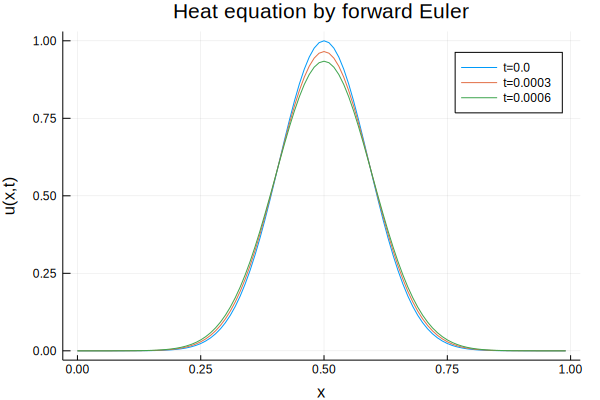

In [5]:
using Plots
plot(x,U[:,1:3:7],label=["t=$t" for t in t[1:3:7]],
    xaxis=("x"),yaxis=("u(x,t)"),
    title="Heat equation by forward Euler")

Shortly thereafter, though, there is nonphysical growth. 

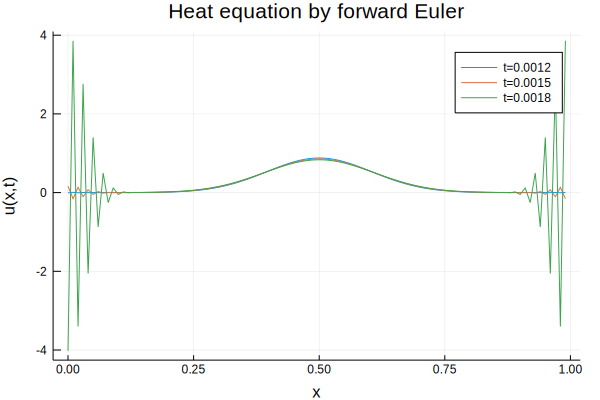

In [6]:
plot(x,U[:,13:3:19],label=["t=$t" for t in t[13:3:19]],
    xaxis=("x"),yaxis=("u(x,t)"),
    title="Heat equation by forward Euler")

The growth is exponential in time.

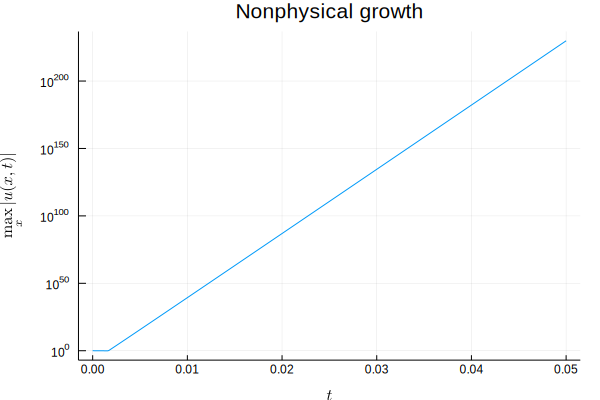

In [7]:
M = vec(maximum( abs.(U), dims=1 ))     # max in each column
plot(t,M,xaxis=("\$t\$"), yaxis=(:log10,"\$\\max_x |u(x,t)|\$"),
    title="Nonphysical growth",leg=:none) 

Now we try backward Euler. In this case there is a tridiagonal linear system to solve at each time step. We will use a sparse matrix to get sparse LU factorization, although the time savings at this size are negligible.

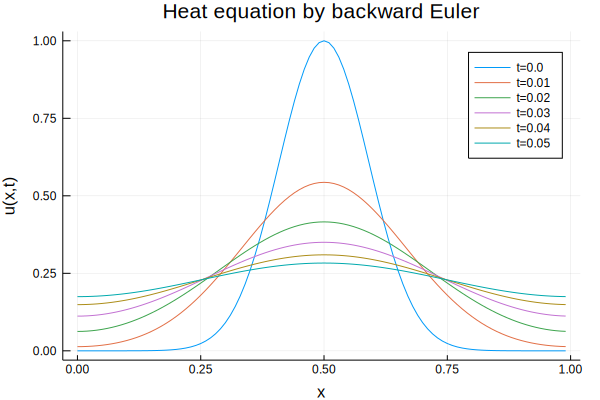

In [8]:
using SparseArrays

B = sparse(I - tau*Dxx)
for j = 1:n
    U[:,j+1] = B\U[:,j]
end

plot(x,U[:,1:100:501],label=["t=$t" for t in t[1:100:501]],
    xaxis=("x"),yaxis=("u(x,t)"),
    title="Heat equation by backward Euler")

This solution looks physically realistic, as the large concentration in the center diffuses outward. Observe that the solution remains periodic in space. 